# Overview

This a notebook that inspects the results of a WarpX simulation.

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [1]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib notebook

## Read data in the simulation frame

### Plot data with yt

In [149]:

ds = yt.load( './plotfiles/plt00090/' ) # Create a dataset object
filenum = 10
#ds.field_list

/usr/local/lib/python3.5/dist-packages/yt-3.6.dev0-py3.5-linux-x86_64.egg/yt/units/yt_array.py:1400: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)



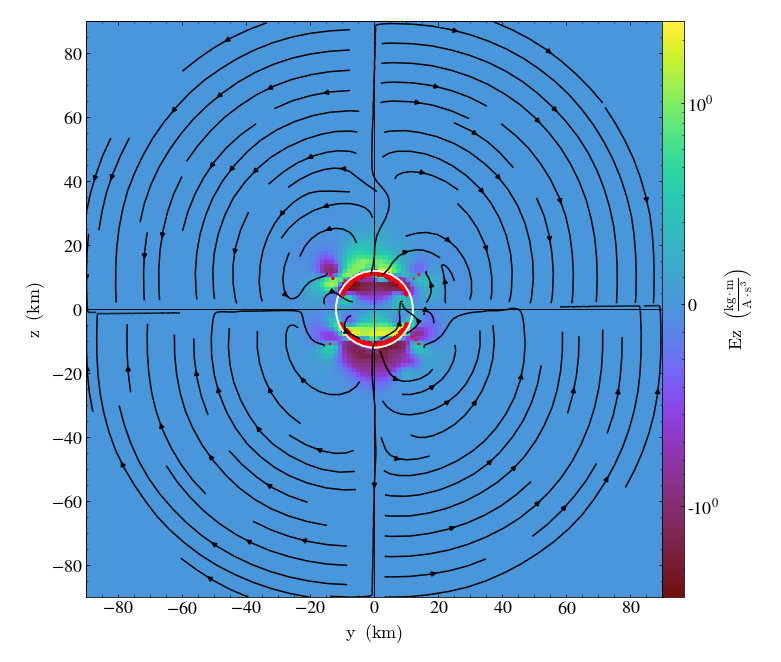

In [150]:

sl = yt.SlicePlot(ds, 0, 'Ez', aspect=1) # Create a sliceplot object
sl.annotate_particles(width=(2.e3, 'm'),ptype="plasma_p",col='b',p_size=5.0)
sl.annotate_particles(width=(2.e3, 'm'),ptype="plasma_e",col='r',p_size=5.0)
sl.annotate_streamlines("Ey", "Ez", plot_args={"color": "black"})
sl.annotate_grids() # Show grids
sl.annotate_sphere([90000.0, 90000.0, 90000.0], radius=12000.0,
                  circle_args={'color':'white', 'linewidth':2})
sl.show() # Show the plot
#sl.save('./particle_in_ring_plt'+str(filenum)+'.png')


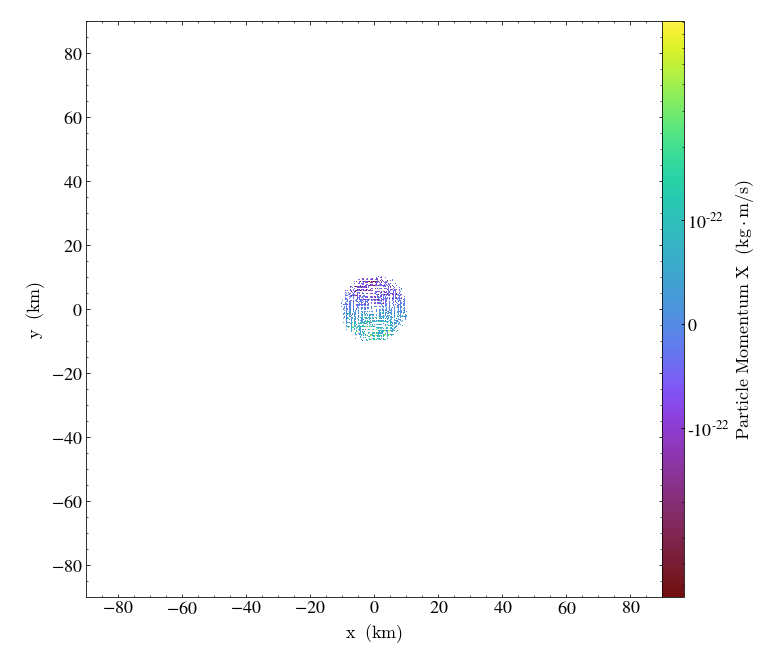

['positron_plt10.png']

In [147]:
p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_x'),('plasma_p', 'particle_position_y'),('plasma_p', 'particle_momentum_x'))
p.show()
p.save("positron_plt"+str(filenum)+".png")


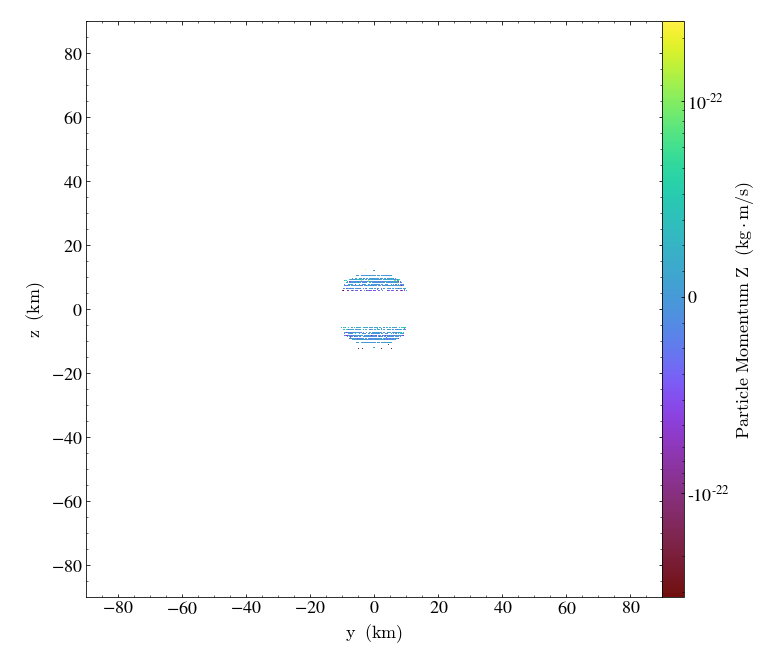

['electrons_plt10.png']

In [148]:
p = yt.ParticlePlot(ds,('plasma_e', 'particle_position_y'),('plasma_e', 'particle_position_z'),('plasma_e', 'particle_momentum_z'))
#p = yt.ParticlePlot(ds,('plasma_p', 'particle_position_y'),('plasma_p', 'particle_position_z'),('plasma_p', 'particle_momentum_x'))
p.show()
p.save("electrons_plt"+str(filenum)+".png")

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def r_cl(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')

    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc))**0.5

    return r

In [ ]:
ds.add_field(("index","r_cl"),function=r_cl,units='m',sampling_type="cell")
#yt.SlicePlot(ds,'z','r_cl')

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def rad(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')

    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5

    return r

In [ ]:
ds.add_field(("index","rad"),function=rad,units='m',sampling_type="cell")
#yt.SlicePlot(ds,'z','rad')

### Store quantities in numpy arrays, and plot with matplotlib

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ex_external(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6
    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) 
    + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ex_ext = Er*c_phi*s_theta + E_theta*c_phi*c_theta

    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] > 12000] = 1.0

 
    return outside.d*Ex_ext.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ex_internal(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6
    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r*r3*(c_theta*s_theta*2.0)
    Ex_ext = Er*c_phi*s_theta + E_theta*c_phi*c_theta

    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] <= 12000] = 1.0

 
    return outside.d*Ex_ext.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ey_external(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6

    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) 
    + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ey_ext = Er*s_phi*s_theta + E_theta*s_phi*c_theta

    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] > 12000] = 1.0

 
    return outside.d*Ey_ext.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ey_internal(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6
    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r*r3*(c_theta*s_theta*2.0)
    Ey_ext = Er*s_phi*s_theta + E_theta*s_phi*c_theta
    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] <= 12000] = 1.0

 
    return outside.d*Ey_ext.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ez_external(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6
    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r_star*B*r3*r_ratio*(1.0-3.0*c_theta*c_theta) 
    + (2.0/3.0)*omega*B*r_star*r_ratio*r_ratio
    E_theta = (-1)*omega*B*r_star*r3*r_ratio*(c_theta*s_theta*2.0)
    Ez_ext = Er*c_theta - E_theta*s_theta

    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] > 12000] = 1.0

 
    return outside.d*Ez_ext.d 
    #return outside.d*Er.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ez_internal(field,data):
    xc = YTQuantity(90000, 'm')
    yc = YTQuantity(90000, 'm')
    zc = YTQuantity(90000, 'm')
    r_star = YTQuantity(12000, 'm')
    omega = 6245.8
    B = 8.03e-6
    r = ((data["y"]-yc)*(data["y"]-yc) + (data["x"]-xc)*(data["x"]-xc) + (data["z"]-zc)*(data["z"]-zc))**0.5
    c_theta = (data["z"]-zc)/r
    s_theta = data["r_cl"]/r
    c_phi   = (data["x"]-xc)/data["r_cl"]
    s_phi   = (data["y"]-yc)/data["r_cl"]
    r_ratio = r_star/r
    r3 = r_ratio*r_ratio*r_ratio
    Er = omega*r*r3*B*s_theta*s_theta
    E_theta = (-1)*omega*B*r*r3*(c_theta*s_theta*2.0)
    Ez_ext = Er*c_theta - E_theta*s_theta

    outside = np.zeros_like(data["r_cl"])
    outside[data["rad"] <= 12000] = 1.0

 
    #return outside.d*Ez_ext.d
    return outside.d*Er.d

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ex_total_ext(field,data):

    return data["Ex_internal"] + data["Ex_external"]

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ey_total_ext(field,data):

    return data["Ey_internal"] + data["Ey_external"]

In [ ]:
from yt.units.yt_array import YTQuantity
from yt.units import kboltz
from numpy.random import random
import numpy as np
from yt.utilities.exceptions import YTUnitOperationError
def Ez_total_ext(field,data):

    return data["Ez_internal"] + data["Ez_external"]

In [ ]:
ds.add_field(("Ex_external"),function=Ex_external,units='',sampling_type="cell")
ds.add_field(("Ey_external"),function=Ey_external,units='',sampling_type="cell")
ds.add_field(("Ez_external"),function=Ez_external,units='',sampling_type="cell")
ds.add_field(("Ex_internal"),function=Ex_internal,units='',sampling_type="cell")
ds.add_field(("Ey_internal"),function=Ey_internal,units='',sampling_type="cell")
ds.add_field(("Ez_internal"),function=Ez_internal,units='',sampling_type="cell")
ds.add_field(("Ex_total_ext"),function=Ex_total_ext,units='',sampling_type="cell")
ds.add_field(("Ey_total_ext"),function=Ey_total_ext,units='',sampling_type="cell")
ds.add_field(("Ez_total_ext"),function=Ez_total_ext,units='',sampling_type="cell")

p = yt.SlicePlot(ds,'x','Ez_external')
p.annotate_streamlines("Ex_external", "Ez_external", 
                  plot_args={"color": "black"})
#p.annotate_particles(width=(2.e3, 'm'),ptype="plasma_p",col='b',p_size=5.0)
#p.annotate_particles(width=(2.e3, 'm'),ptype="plasma_e",col='r',p_size=5.0)
p.show()
p = yt.SlicePlot(ds,'x','Ez_internal')
p.annotate_streamlines("Ex_internal", "Ez_internal", 
                  plot_args={"color": "black"})

## Read data back-transformed to the lab frame when the simulation runs in the boosted frame (example: 2D run)

In [ ]:
# read_raw_data.py is located in warpx/Tools.
import os, glob
#import read_raw_data

In [ ]:
#species = 'beam'
#iteration = 1
#field = 'Ex'

#snapshot = './lab_frame_data/' + 'snapshot' + str(iteration).zfill(5)
#header   = './lab_frame_data/Header'
#allrd, info = read_raw_data.read_lab_snapshot(snapshot, header) # Read field data
#F = allrd[field]
#print( "Available info: ", *list(info.keys()) )
#print("Available fields: ", info['field_names'])
#nx = info['nx']
#nz = info['nz']
#x = info['x']
#z = info['z']
#xbo  = read_raw_data.get_particle_field(snapshot, species, 'x') # Read particle data
#ybo  = read_raw_data.get_particle_field(snapshot, species, 'y')
#zbo  = read_raw_data.get_particle_field(snapshot, species, 'z')
#uzbo = read_raw_data.get_particle_field(snapshot, species, 'uz')

#plt.figure(figsize=(6, 3))
#extent = np.array([info['zmin'], info['zmax'], info['xmin'], info['xmax']])
#plt.imshow(F, aspect='auto', extent=extent, cmap='seismic')
#plt.colorbar()
#plt.plot(zbo, xbo, 'g.', markersize=1.)


## Read back-transformed data with hdf5 format (example: 3D run)

5e10*1400*1400

In [ ]:
5e6*1400*1400

In [ ]:
685708*1400*1400